Import all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the CSV file

In [2]:
df=pd.read_csv('../input/glass/glass.csv')

Let us check the head of the file to understand the data 

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


We can see that there are no  null values.

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Let us draw a correlation heat map to see the relation between different parameters

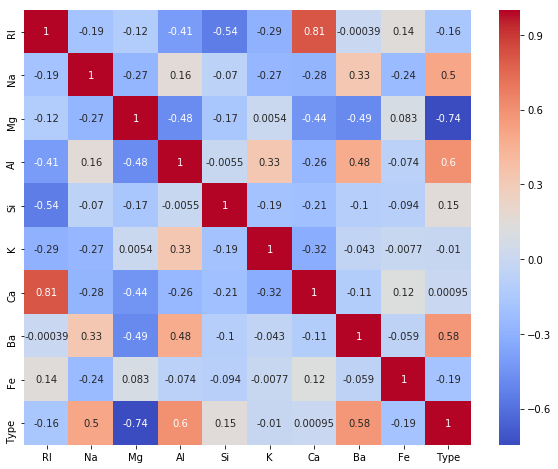

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Let us visualize the content of different elements in the  various types of glass

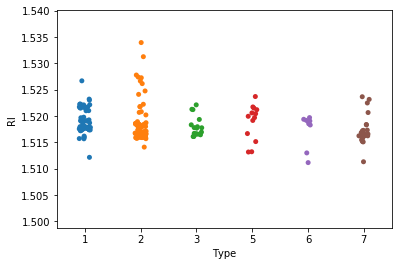

In [7]:
sns.stripplot(x='Type',y='RI',data=df)

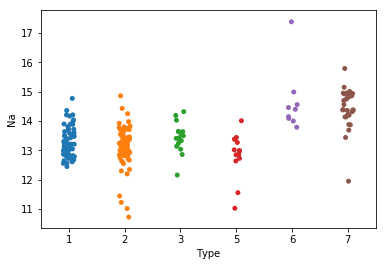

In [8]:
sns.stripplot(x='Type',y='Na',data=df)

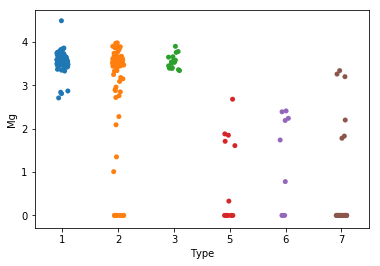

In [9]:
sns.stripplot(x='Type',y='Mg',data=df)

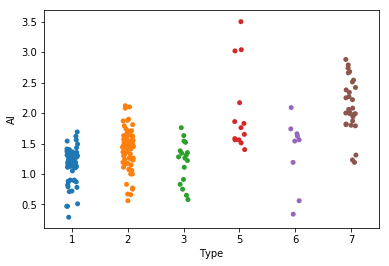

In [10]:
sns.stripplot(x='Type',y='Al',data=df)

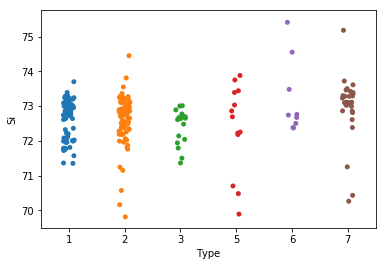

In [11]:
sns.stripplot(x='Type',y='Si',data=df)

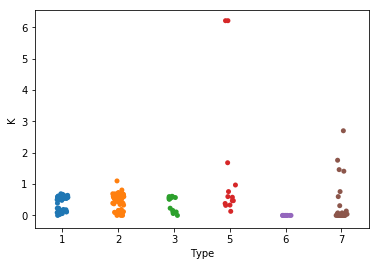

In [12]:
sns.stripplot(x='Type',y='K',data=df)

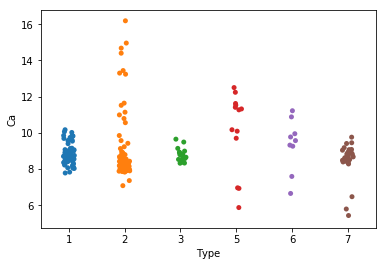

In [13]:
sns.stripplot(x='Type',y='Ca',data=df)

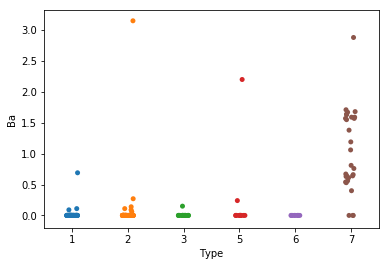

In [14]:
sns.stripplot(x='Type',y='Ba',data=df)

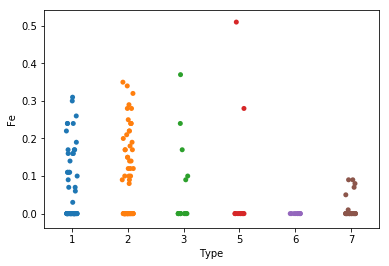

In [15]:
sns.stripplot(x='Type',y='Fe',data=df)

After visualization we cann see that the contents vary for different types of glass

Let us import StandardScaler to normalize the data because  the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()


In [18]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_features=scaler.transform(df.drop('Type',axis=1))
df_head=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df_head,df['Type'], test_size=0.3, random_state=40)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn=KNeighborsClassifier(n_neighbors=5)


In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
pred=knn.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print('Classification Report ',classification_report(y_test,pred))

Classification Report                precision    recall  f1-score   support

           1       0.47      0.79      0.59        19
           2       0.73      0.64      0.68        25
           3       0.00      0.00      0.00         8
           5       0.67      0.67      0.67         3
           6       1.00      0.33      0.50         3
           7       1.00      0.86      0.92         7

    accuracy                           0.62        65
   macro avg       0.64      0.55      0.56        65
weighted avg       0.60      0.62      0.59        65



In [28]:
print('Confusion Matrix',confusion_matrix(y_test,pred))

Confusion Matrix [[15  3  1  0  0  0]
 [ 8 16  0  1  0  0]
 [ 6  2  0  0  0  0]
 [ 1  0  0  2  0  0]
 [ 1  1  0  0  1  0]
 [ 1  0  0  0  0  6]]


Let us use the elbow method to choose the best value for K.

In [29]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

Text(0, 0.5, 'error_rate')

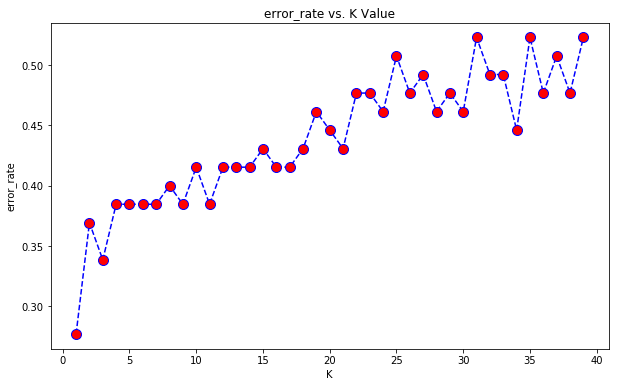

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('error_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('error_rate')

We can see that at K=1 we have low error rate.
Hence we will perform the test with K=1

In [31]:
knn=KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [33]:
pred=knn.predict(x_test)

In [34]:
print('Classification Report ',classification_report(y_test,pred))

Classification Report                precision    recall  f1-score   support

           1       0.59      0.89      0.71        19
           2       0.82      0.72      0.77        25
           3       0.67      0.25      0.36         8
           5       0.67      0.67      0.67         3
           6       1.00      0.67      0.80         3
           7       1.00      0.86      0.92         7

    accuracy                           0.72        65
   macro avg       0.79      0.68      0.70        65
weighted avg       0.75      0.72      0.71        65



In [35]:
print('Confusion Matrix',confusion_matrix(y_test,pred))

Confusion Matrix [[17  1  1  0  0  0]
 [ 6 18  0  1  0  0]
 [ 5  1  2  0  0  0]
 [ 1  0  0  2  0  0]
 [ 0  1  0  0  2  0]
 [ 0  1  0  0  0  6]]


We can see that at K=1 precision has increases 
Hence selecting K=1 is justified 